In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
df = pd.read_csv('..//database//Car-dataset//data.csv')

In [ ]:
df.head(10)

In [64]:
df[df['Make']=='Chevrolet'].sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9637,Chevrolet,Silverado 1500,2017,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,NaN,Large,Extended Cab Pickup,20,15,1385,44815
4430,Chevrolet,Express,2014,flex-fuel (unleaded/E85),310.0,8.0,AUTOMATIC,all wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,17,13,1385,34525
3026,Chevrolet,Corvette,2017,premium unleaded (recommended),460.0,8.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,25,16,1385,64905
6553,Chevrolet,Lumina,1999,regular unleaded,160.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,26,17,1385,2000
2623,Chevrolet,C/K 1500 Series,1997,regular unleaded,230.0,8.0,MANUAL,rear wheel drive,2.0,NaN,Large,Extended Cab Pickup,19,14,1385,2891
9593,Chevrolet,Silverado 1500,2016,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,four wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,22,17,1385,36680
5826,Chevrolet,Impala,2015,flex-fuel (unleaded/E85),305.0,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,29,19,1385,35440
4446,Chevrolet,Express,2016,flex-fuel (unleaded/E85),285.0,8.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Large,Passenger Van,16,11,1385,37155
9793,Chevrolet,Sonic,2017,regular unleaded,138.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,33,25,1385,15145
5831,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,25,17,1385,40810


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [66]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()

In [67]:
numeric_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [68]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [69]:
len(df['Make'].unique())

48

In [70]:
df.dropna(subset=['Engine HP'], inplace=True)

In [ ]:
df.isnull().sum()

In [73]:
correlation = df[numeric_cols].corr()

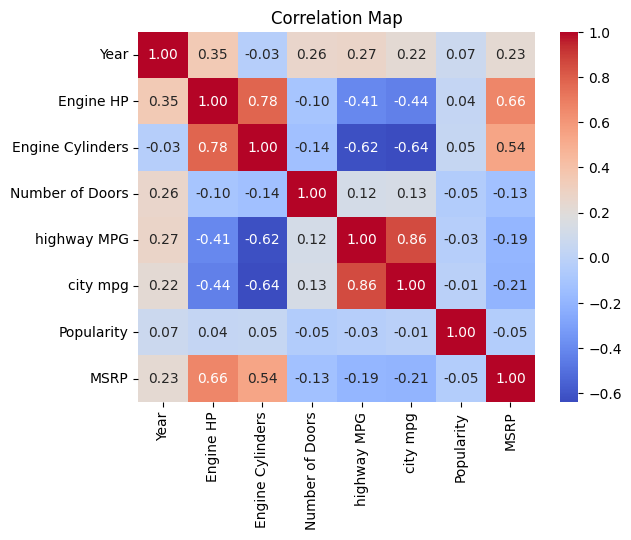

In [74]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map')
plt.show()

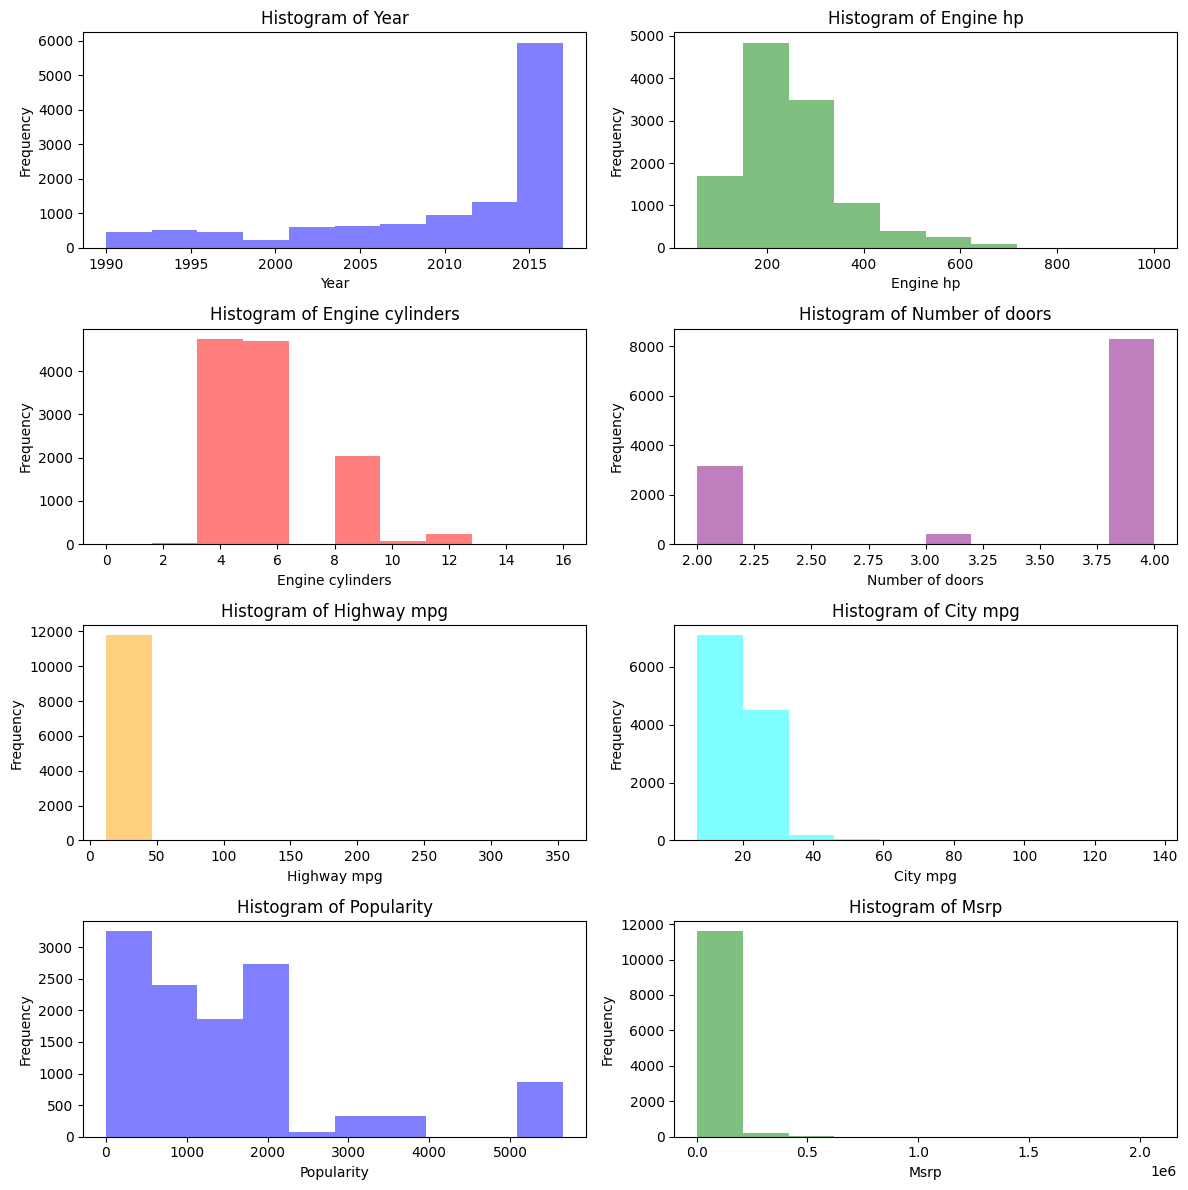

In [75]:
fig, ax = plt.subplots(4, 2, figsize=(12,12))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'blue', 'green']

for i, feature in enumerate(numeric_cols):
    row = i // 2
    col = i % 2
    ax[row, col].hist(df[feature],  color=colors[i], alpha=0.5)
    ax[row, col].set_title(f'Histogram of {feature.capitalize()}')
    ax[row, col].set_xlabel(feature.capitalize())
    ax[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [76]:
# Selecting feature Engine HP because it has a high correlation with Price(MSRP), that is the target 
X = df[['Engine HP']]
Y = df['MSRP']

In [77]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [78]:
X_train.isnull().sum()

Engine HP    0
dtype: int64

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [82]:
prediction_df = pd.DataFrame({
    'Engine HP': X_test['Engine HP'],
    'Predicted Price': model.predict(X_test)
})
prediction_df

,Engine HP,Predicted Price
6457,240.0,37033.949961
4201,178.0,15311.293062
5709,155.0,7252.888084
8818,449.0,110260.325634
9509,285.0,52800.394484
...,...,...
7191,150.0,5501.060915
393,155.0,7252.888084
3998,291.0,54902.587087
8443,165.0,10756.542422


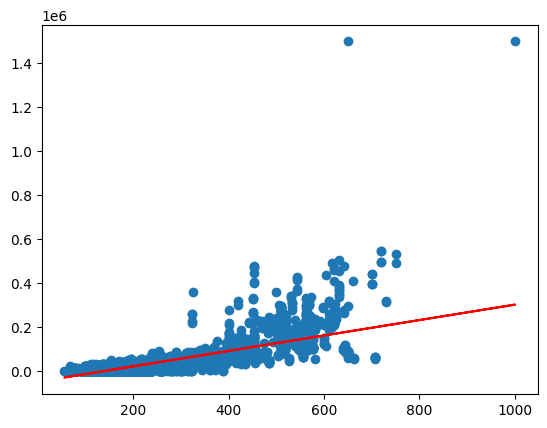

In [86]:
plt.scatter(X_train,y_train)
plt.plot(prediction_df['Engine HP'],prediction_df['Predicted Price'], color='red' )

In [ ]:
df[df['MSRP'] > 1000000]

In [96]:
y_train.sort_values(ascending=False)

11363    1500000
8486     1500000
1622      548800
1626      548800
1629      535500
          ...   
7288        2000
793         2000
781         2000
993         2000
11482       2000
Name: MSRP, Length: 8291, dtype: int64

In [97]:
# Evaluating the model
print('Mean Squared Error:', mean_squared_error(y_test, model.predict(X_test)))
print('R2 Score:', r2_score(y_test, model.predict(X_test)))

Mean Squared Error: 3407485525.587807
R2 Score: 0.3581159538734965
